In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 1: Load Dataset 

In [2]:
df=pd.read_csv("Fraud Dataset.csv")
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/29/2019 22:05,3.550000e+15,"fraud_Parisian, Schiller and Altenwerth",misc_net,666.70,Cody,Blake,M,300 Hodge Loaf,Houston,...,29.7396,-95.4460,2906700,Community development worker,3/14/1962,5ea472d933561e36dcad710839b9ed6b,1327874723,29.806815,-95.377033,1
1,1/6/2019 15:25,3.520000e+15,"fraud_Hagenes, Kohler and Hoppe",food_dining,1.93,Micheal,Walters,M,15315 Vaughn Park Suite 356,Hovland,...,47.8342,-90.0476,272,Freight forwarder,7/5/2001,fb373b76f05670ce23402ace28650dfb,1325863529,46.835966,-89.251001,0
2,1/13/2019 17:49,3.760000e+14,fraud_Kilback LLC,food_dining,23.03,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,41.1558,-101.1360,1789,Insurance broker,2/11/1982,06f5d997085b59dda6dbf1ae2ed33b71,1326476990,41.938008,-101.775582,0
3,4/3/2019 23:48,5.140000e+15,"fraud_Streich, Dietrich and Barton",shopping_net,994.00,Dakota,Fowler,M,16220 Joseph Point Suite 096,Mountain City,...,36.4657,-81.8140,13021,Tree surgeon,7/17/2001,db194959b156dee693d5599a2ec54382,1333496912,37.324006,-80.905928,1
4,1/8/2019 15:12,3.550000e+15,fraud_Kuhic LLC,shopping_net,194.94,Sara,Harris,F,597 Jenny Ford Apt. 543,Tupper Lake,...,44.2320,-74.4905,6120,Chartered loss adjuster,10/9/1976,69bf1ad18f8c2b366ffe8d7d8a55cf29,1326035535,44.126948,-74.685703,0


## 2: Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36003 entries, 0 to 36002
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  36003 non-null  object 
 1   cc_num                 36003 non-null  float64
 2   merchant               36003 non-null  object 
 3   category               36003 non-null  object 
 4   amt                    36003 non-null  float64
 5   first                  36003 non-null  object 
 6   last                   36003 non-null  object 
 7   gender                 36003 non-null  object 
 8   street                 36003 non-null  object 
 9   city                   36003 non-null  object 
 10  state                  36003 non-null  object 
 11  zip                    36003 non-null  int64  
 12  lat                    36003 non-null  float64
 13  long                   36003 non-null  float64
 14  city_pop               36003 non-null  int64  
 15  jo

In [4]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.600300e+04,36003.000000,36003.000000,36003.000000,36003.000000,3.600300e+04,3.600300e+04,36003.000000,36003.000000,36003.000000
mean,4.122955e+17,144.713156,48735.117768,38.542404,-90.197088,9.025784e+04,1.329060e+09,38.540923,-90.196716,0.166819
std,1.301276e+18,266.773817,27014.204909,5.094149,13.909484,2.993324e+05,7.932928e+06,5.126182,13.927362,0.372820
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,1.800000e+14,12.890000,25526.000000,34.703200,-96.798000,7.430000e+02,1.325871e+09,34.825788,-96.908642,0.000000
50%,3.520000e+15,54.880000,48088.000000,39.354300,-87.456900,2.518000e+03,1.326313e+09,39.356827,-87.396217,0.000000
75%,4.640000e+15,110.535000,72042.000000,41.846700,-80.128400,2.113400e+04,1.326715e+09,41.930296,-80.167323,0.000000
max,4.990000e+18,11872.210000,99783.000000,66.693300,-67.950300,3.999759e+06,1.362917e+09,67.510267,-66.967742,1.000000


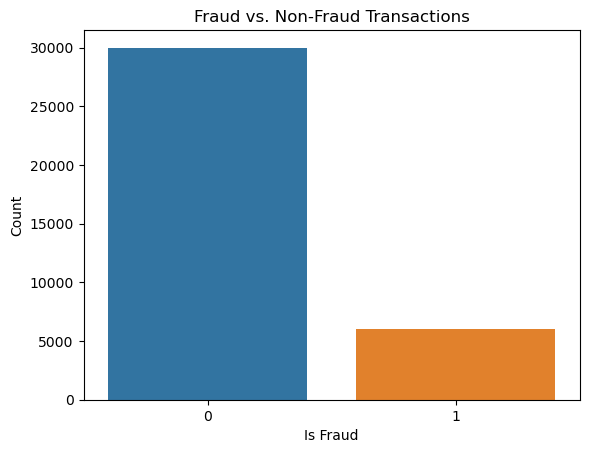

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


In [6]:
df['is_fraud'].value_counts()   #dataset imbalanced 

0    29997
1     6006
Name: is_fraud, dtype: int64

In [7]:
# Balancing the dataset 
df_majority = df[df['is_fraud'] == 0]  
df_minority = df[df['is_fraud'] == 1]  


In [8]:
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42) # randomly resample data with 1 to same number of 0 

In [9]:
df_balanced = pd.concat([df_majority_downsampled, df_minority]) #combine both dataset again 

In [10]:
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle the dataset so that is not by order

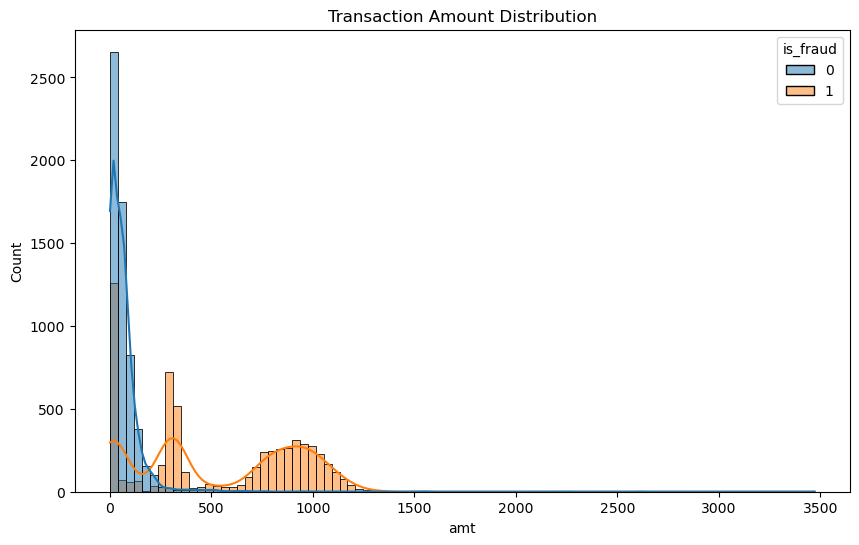

In [11]:

df['is_fraud'] = df['is_fraud'].astype(int)

plt.figure(figsize=(10,6))
sns.histplot(x='amt', hue='is_fraud', data=df, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

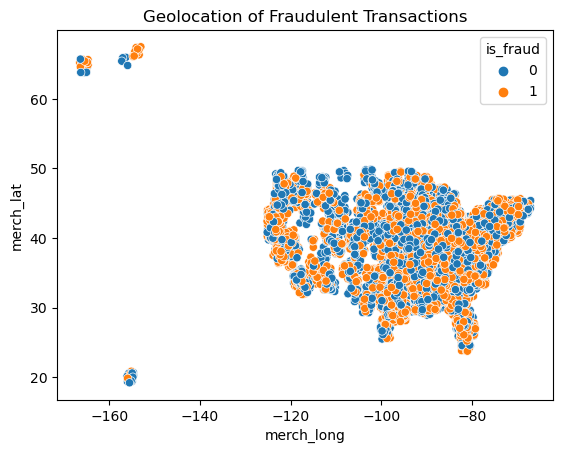

In [12]:
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=df)
plt.title("Geolocation of Fraudulent Transactions")
plt.show()

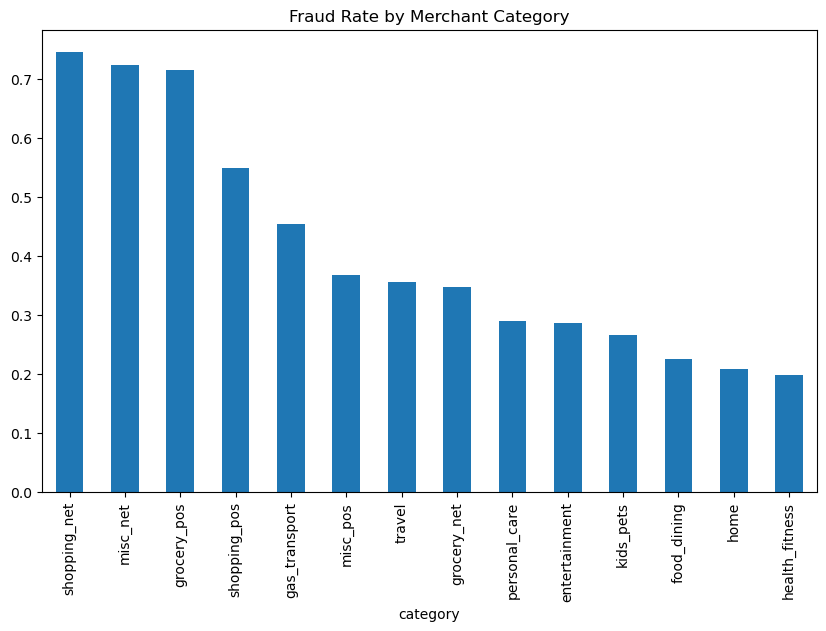

In [13]:
fraud_by_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
fraud_by_category.plot(kind='bar')
plt.title("Fraud Rate by Merchant Category")
plt.show()


## 3: Data Preparation

In [14]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']) #convert date format into datetime

In [15]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = (pd.to_datetime('today') - df['dob']).dt.days // 365  #Feature engineering :: Create 'age' from 'dob' 

In [16]:
df = df.drop(['first', 'last', 'cc_num', 'trans_num', 'dob'], axis=1) #Drop the columns that are unecessary in helping prediction

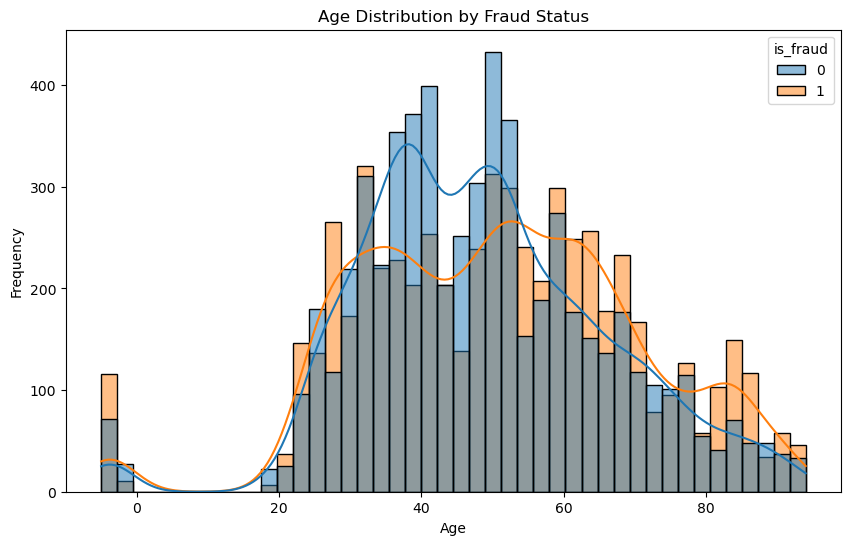

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x='age', hue='is_fraud', data=df, kde=True)
plt.title("Age Distribution by Fraud Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

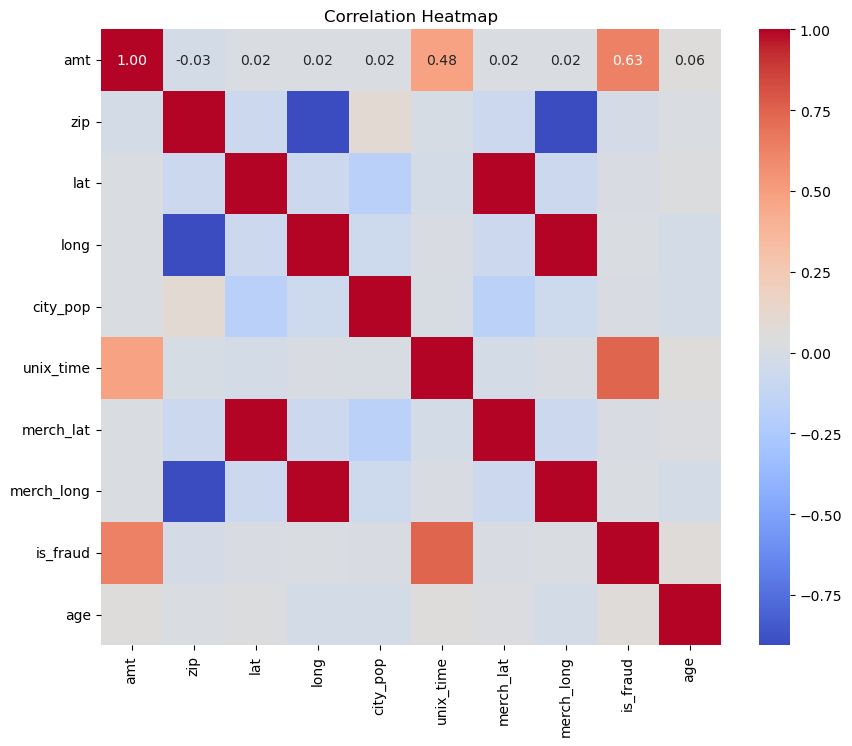

In [18]:
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 4: Data Preprocessing

In [19]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']                #Split feature from output

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split Train and Test set 

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Create pipeline for data preprocessing 

num_att = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age']  #Define the numerical feature
cat_att = ['merchant', 'category', 'gender', 'job', 'city', 'state']            #Define categorical feature 


num_pipe = make_pipeline(  # preprocessing for numerical data 
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

cat_pipe = make_pipeline(  # preprocessing for categorical data 
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([ # combining numerical annd categorical data
    ("num", num_pipe, num_att),
    ("cat", cat_pipe, cat_att)
])

In [22]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['amt', 'lat', 'long', 'city_pop', 'merch_lat',
                                  'merch_long', 'age']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['merchant', 'category', 'gender', 'job',
                                  'city', 'state'])])

## 5: Modelling

##### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = make_pipeline(preprocessing, LogisticRegression(random_state = 10))
log_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'lat', 'long',
                                                   'city_pop', 'merch_lat',
                                                   'merch_long', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category',
                                                   'gender', 'job', 'city',
                                                   'state'])])),
                ('logisticregression', LogisticRegression(random_state=10))])

In [24]:
log_acc = cross_val_score(log_reg,X_train, y_train, scoring = 'accuracy' ,cv = 10)

log_acc

array([0.86563615, 0.83472057, 0.84185493, 0.83234245, 0.84185493,
       0.85731272, 0.83590963, 0.86325803, 0.8547619 , 0.84404762])

In [25]:
pd.Series(log_acc).describe()

count    10.000000
mean      0.847170
std       0.012148
min       0.832342
25%       0.837396
50%       0.842951
75%       0.856675
max       0.865636
dtype: float64

##### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

D_tree = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=10))
D_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'lat', 'long',
                                                   'city_pop', 'merch_lat',
                                                   'merch_long', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category',
                                                   'gender', 'job', 'city',
                                                   'state'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=10))])

In [27]:
D_tree_acc = cross_val_score(D_tree,X_train, y_train, scoring = 'accuracy' ,cv = 10)

D_tree_acc

array([0.95838288, 0.95362663, 0.95719382, 0.95838288, 0.95838288,
       0.960761  , 0.95600476, 0.96195006, 0.97142857, 0.95      ])

In [28]:
pd.Series(D_tree_acc).describe()

count    10.000000
mean      0.958611
std       0.005657
min       0.950000
25%       0.956302
50%       0.958383
75%       0.960166
max       0.971429
dtype: float64

##### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = make_pipeline(preprocessing, RandomForestClassifier(random_state= 10))
rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'lat', 'long',
                                                   'city_pop', 'merch_lat',
                                                   'merch_long', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category',
                                                   'gender', 'job', 'city',
                                                   'state'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=10))])

In [30]:
R_forest_acc = cross_val_score(rf,X_train, y_train, scoring = 'accuracy' ,cv = 10)

R_forest_acc

array([0.92508918, 0.9334126 , 0.9334126 , 0.93816885, 0.95005945,
       0.94887039, 0.94292509, 0.94411415, 0.92738095, 0.9297619 ])

In [31]:
pd.Series(R_forest_acc).describe()

count    10.000000
mean      0.937320
std       0.008882
min       0.925089
25%       0.930675
50%       0.935791
75%       0.943817
max       0.950059
dtype: float64

##### SVC

In [32]:
from sklearn.svm import SVC

svc = make_pipeline(preprocessing, SVC(random_state=10))

svc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'lat', 'long',
                                                   'city_pop', 'merch_lat',
                                                   'merch_long', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category',
                                                   'gender', 'job', 'city',
                                                   'state'])])),
                ('svc', SVC(random_state=10))])

In [33]:
svm_acc = cross_val_score(svc, X_train, y_train,scoring = 'accuracy' ,cv=10)
svm_acc

array([0.85850178, 0.85731272, 0.86682521, 0.85255648, 0.85731272,
       0.882283  , 0.85850178, 0.88109394, 0.86904762, 0.85714286])

In [34]:
pd.Series(svm_acc).describe()

count    10.000000
mean      0.864058
std       0.010476
min       0.852556
25%       0.857313
50%       0.858502
75%       0.868492
max       0.882283
dtype: float64

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

GBM = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=10))
GBM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'lat', 'long',
                                                   'city_pop', 'merch_lat',
                                                   'merch_long', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category',
                                                   'gender', 'job', 'city',
                                                   'state'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=10))])

In [36]:
GBM_acc = cross_val_score(GBM, X_train, y_train, scoring = 'accuracy',cv = 10)
GBM_acc

array([0.95243757, 0.94768133, 0.94649227, 0.94054697, 0.95243757,
       0.9667063 , 0.94887039, 0.95362663, 0.95      , 0.9547619 ])

In [37]:
pd.Series(GBM_acc).describe()

count    10.000000
mean      0.951356
std       0.006805
min       0.940547
25%       0.947979
50%       0.951219
75%       0.953329
max       0.966706
dtype: float64

In [38]:
print(f" LogReg Result:\n {pd.Series(log_acc).describe()}")
print(f" D_tree Result:\n {pd.Series(D_tree_acc).describe()}")
print(f" RF Result:\n {pd.Series(R_forest_acc).describe()}")
print(f" SVC Result:\n {pd.Series(svm_acc).describe()}")
print(f"GBM Result:\n {pd.Series(GBM_acc).describe()}")


 LogReg Result:
 count    10.000000
mean      0.847170
std       0.012148
min       0.832342
25%       0.837396
50%       0.842951
75%       0.856675
max       0.865636
dtype: float64
 D_tree Result:
 count    10.000000
mean      0.958611
std       0.005657
min       0.950000
25%       0.956302
50%       0.958383
75%       0.960166
max       0.971429
dtype: float64
 RF Result:
 count    10.000000
mean      0.937320
std       0.008882
min       0.925089
25%       0.930675
50%       0.935791
75%       0.943817
max       0.950059
dtype: float64
 SVC Result:
 count    10.000000
mean      0.864058
std       0.010476
min       0.852556
25%       0.857313
50%       0.858502
75%       0.868492
max       0.882283
dtype: float64
GBM Result:
 count    10.000000
mean      0.951356
std       0.006805
min       0.940547
25%       0.947979
50%       0.951219
75%       0.953329
max       0.966706
dtype: float64


## 6: Fine Tuning

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


param_grids = {
    
    'decision_tree': {
        'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy', 'log_loss', 'mae', 'poisson'],
        'model__max_depth': [None, 1, 2, 5, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10, 20, 50]
    },
    
    'gbm': {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [10,20,25,50, 100, 200],
        'model__learning_rate': [0.001,0.01, 0.1, 0.2],
        'model__max_depth': [1 ,2, 3, 5, 7]
    },
    'random_forest': {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [10,20,25,50, 100, 200],
        'model__max_depth': [None, 1, 2, 5, 10, 20, 30],
        'model__criterion': ['gini', 'entropy']
    }

}
best_models = {}
best_scores = {}
std_scores = {}

for model_name, param_grid in param_grids.items():
    print(f"{model_name}")
    
 
    pipeline = Pipeline([
        ('preprocessing', preprocessing),  
        ('model', param_grid['model'][0])
    ])
    
   
    grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    

    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
  
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}\n")
    
    std_score = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    std_scores[model_name] = std_score
    print(f"Standard Deviation for {model_name}: {std_score}\n")

results_df = pd.DataFrame(list(best_scores.items()), columns=['Model', 'Best Score'])
print(results_df)

decision_tree
Best Parameters for decision_tree: {'model': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20), 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_split': 20}
Best Score for decision_tree: 0.9638430723062112

Standard Deviation for decision_tree: 0.00399528374256135

gbm
Best Parameters for gbm: {'model': GradientBoostingClassifier(max_depth=7, n_estimators=200), 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}
Best Score for gbm: 0.9634879112168054

Standard Deviation for gbm: 0.004381566015852876

random_forest
Best Parameters for random_forest: {'model': RandomForestClassifier(criterion='entropy', n_estimators=200), 'model__criterion': 'entropy', 'model__max_depth': None, 'model__n_estimators': 200}
Best Score for random_forest: 0.9413628899835796

Standard Deviation for random_forest: 0.00771085009961893

           Model  Best Score
0  decision_tree    0.963843
1            gbm    0.

##### Fine Tuning with Feature selection ( Variance Threshold )

In [40]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.01)
 

param_grids ={
'decision_tree_fs': {
        'feature_selection__threshold': [0.01, 0.1, 0.2],
        'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy', 'log_loss', 'mae', 'poisson'],
        'model__max_depth': [None, 1, 2, 5, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10, 20, 50]
    },
    
    'gbm_fs': {
        'feature_selection__threshold': [0.01, 0.1, 0.2],
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [10,20,25,50, 100, 200],
        'model__learning_rate': [0.001,0.01, 0.1, 0.2],
        'model__max_depth': [1 ,2, 3, 5, 7]
    },
   'random_forest_fs': {
        'feature_selection__threshold': [0.01, 0.1, 0.2],
        'model': [RandomForestClassifier()],
        'model__n_estimators': [10,20,25,50, 100, 200],
        'model__max_depth': [None, 1, 2, 5, 10, 20, 30],
        'model__criterion': ['gini', 'entropy']
    }
}

best_models_fs = {}
best_scores_fs = {}
std_scores_fs = {}

for model_name, param_grid in param_grids.items():
    print(f"{model_name} with feature selection...")


    pipeline = Pipeline([

        ('preprocessing', preprocessing),
        ('feature_selection', var_thresh),
        ('model', param_grid['model'][0])
    ])


    grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)


    best_models_fs[model_name] = grid_search.best_estimator_
    best_scores_fs[model_name] = grid_search.best_score_

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}\n")

    std_score = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    std_scores_fs[model_name] = std_score

    print(f"Standard Deviation for {model_name}: {std_score}\n")


results_df_fs = pd.DataFrame(list(best_scores_fs.items()), columns=['Model', 'Best Score'])
print(results_df_fs)

decision_tree_fs with feature selection...
Best Parameters for decision_tree_fs: {'feature_selection__threshold': 0.01, 'model': DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=50), 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_split': 50}
Best Score for decision_tree_fs: 0.9633674480493741

Standard Deviation for decision_tree_fs: 0.004543930333543755

gbm_fs with feature selection...
Best Parameters for gbm_fs: {'feature_selection__threshold': 0.01, 'model': GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200), 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 200}
Best Score for gbm_fs: 0.9690787611120548

Standard Deviation for gbm_fs: 0.006079743261926273

random_forest_fs with feature selection...
Best Parameters for random_forest_fs: {'feature_selection__threshold': 0.01, 'model': RandomForestClassifier(criterion='entropy'), 'model__criterion': 'entropy', 'model__max_depth':

## 7: Evaluation

In [41]:
final_model_fs = best_models_fs['gbm_fs']

Accuracy_fs: 0.9648
Recall_fs: 0.9648
Precision_fs: 0.9648
F1 Score_fs: 0.9648

Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1824
           1       0.96      0.97      0.96      1780

    accuracy                           0.96      3604
   macro avg       0.96      0.96      0.96      3604
weighted avg       0.96      0.96      0.96      3604



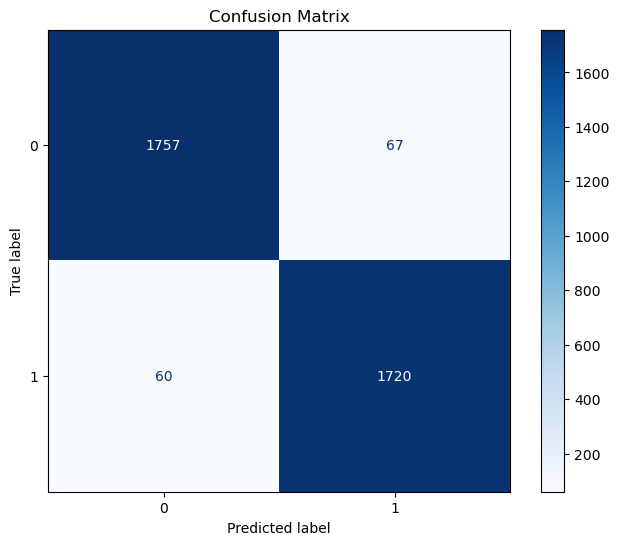

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt



final_predictions_fs = final_model_fs.predict(X_test)

                               
final_fs_accuracy = accuracy_score(y_test, final_predictions_fs)
final_fs_recall = recall_score(y_test, final_predictions_fs, average='weighted')
final_fs_precision = precision_score(y_test, final_predictions_fs, average='weighted')
final_fs_f1 = f1_score(y_test, final_predictions_fs, average='weighted')
conf_fs_matrix = confusion_matrix(y_test, final_predictions_fs)
cm_fs_display = ConfusionMatrixDisplay(confusion_matrix=conf_fs_matrix, display_labels=final_model_fs.classes_)

print(f"Accuracy_fs: {final_fs_accuracy:.4f}")
print(f"Recall_fs: {final_fs_recall:.4f}")
print(f"Precision_fs: {final_fs_precision:.4f}")
print(f"F1 Score_fs: {final_fs_f1:.4f}")
print('')

print(f"Classification report")
print(classification_report(y_test, final_predictions_fs))

fig, ax = plt.subplots(figsize=(8, 6))
cm_fs_display.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

